In [223]:
import seaborn as sns

In [224]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [225]:
# bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g 를 가지고
# svc를 사용하여 어떤 종인지(species) 를 분류하자! 예측하자! - 17참조

In [226]:
pg = penguins[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
pg

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [227]:
print(pg.isnull().sum())
print(pg.isna().sum())

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64
species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64


In [228]:
pg.dropna(inplace=True)
print(pg.isnull().sum())
print(pg.isna().sum())

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64
species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


C:\Users\Daniel\AppData\Local\Temp\ipykernel_26212\1045924427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pg.dropna(inplace=True)


In [229]:
from sklearn.svm import SVC, LinearSVC
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [230]:
pg

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [231]:
pg['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [232]:
# spcies가 문자라서 머신러닝에서는 처리가 불가하여 숫자로 변경한다.
# .loc를 사용하여 모든 행(:)의 'species' 컬럼에 값을 할당
pg.loc[:,"species"] = pg["species"].map(lambda x : 0 if x =="Adelie" else ( 1 if  x =="Chinstrap" else 2))

In [233]:
pg

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0
340,2,46.8,14.3,215.0,4850.0
341,2,50.4,15.7,222.0,5750.0
342,2,45.2,14.8,212.0,5200.0


In [234]:

x = pg[["bill_length_mm", "bill_depth_mm"]].values
y = pg["species"]
y.dtype

dtype('O')

In [235]:
y = pg["species"].astype(int)

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
y.dtype

dtype('int64')

In [236]:
# 시각화 함수 정의
def plot_decision_regions(x, y, classifier):
    cmap =  ListedColormap(("red","green", "blue"))

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 =  np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    
    # 그리드의 모든 점에 대해 예측 수행
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    # 결정 경계 그리기
    plt.contourf(xx1, xx2, z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터 샘플 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], marker='.', label=cl)


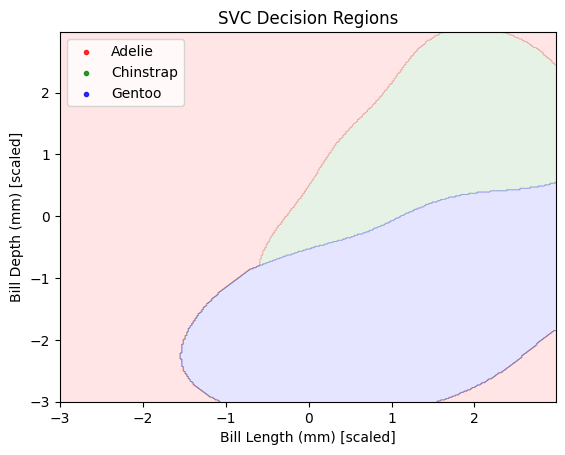

In [237]:
svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
svc.fit(x_scale, y)

plot_decision_regions(x, y, svc)
plt.title('SVC Decision Regions')
plt.xlabel('Bill Length (mm) [scaled]')
plt.ylabel('Bill Depth (mm) [scaled]')
species_names = ['Adelie', 'Chinstrap', 'Gentoo']
plt.legend(loc='upper left')
legend = plt.legend(loc='upper left')
for i, name in enumerate(species_names):
    legend.get_texts()[i].set_text(name)

plt.show()


In [240]:
x1 = pg[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

In [241]:
from itertools import combinations

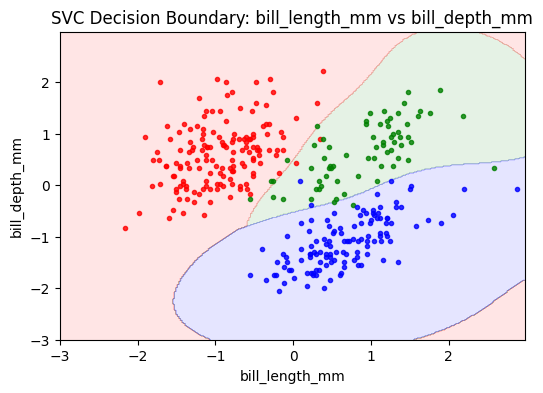

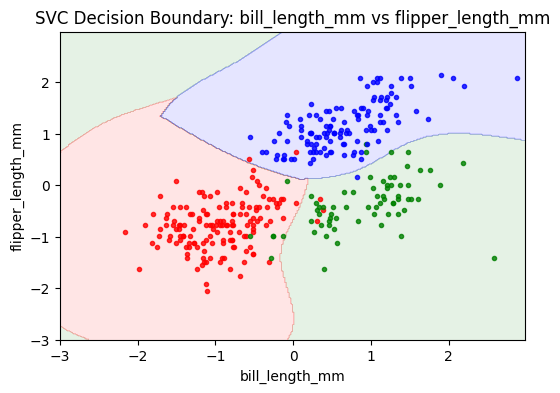

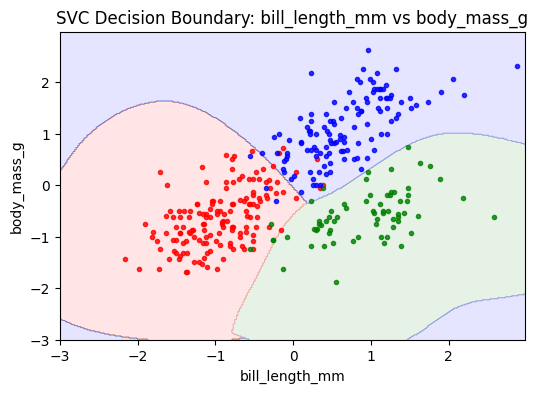

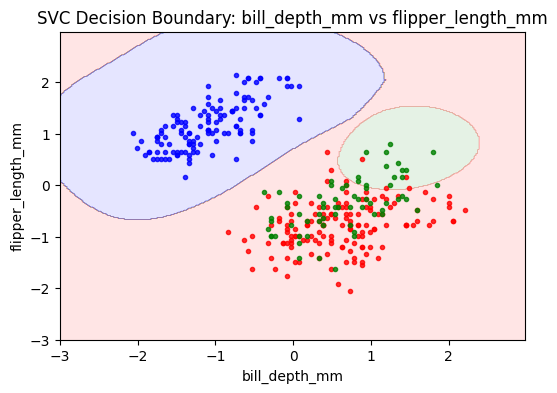

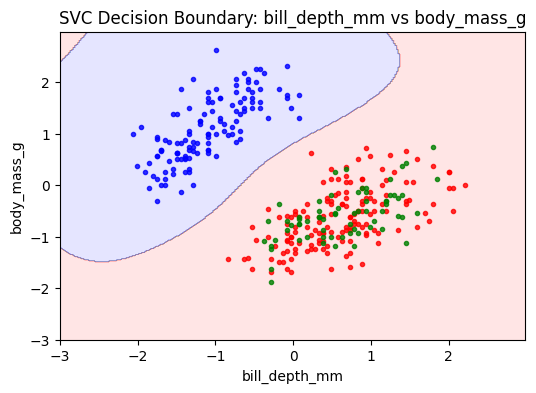

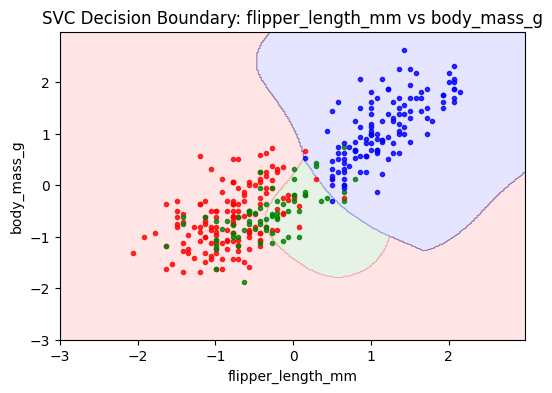

In [242]:
for f1, f2 in combinations(x1, 2):
    x2 = pg[[f1, f2]].values
    # 스케일 조정
    sc = StandardScaler()
    x_scaled = sc.fit_transform(x2)

    svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
    svc.fit(x_scaled, y)

    plt.figure(figsize=(6, 4))
    plot_decision_regions(x_scaled, y, svc)
    plt.title(f"SVC Decision Boundary: {f1} vs {f2}")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

In [244]:
# 시각화 함수 정의
def plot_decision_regions2(x, y, classifier, ax, f1, f2):
    cmap =  ListedColormap(("red","green", "blue"))

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 =  np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    
    # 그리드의 모든 점에 대해 예측 수행
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    # 결정 경계 그리기
    plt.contourf(xx1, xx2, z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터 샘플 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], marker='.', label=cl)

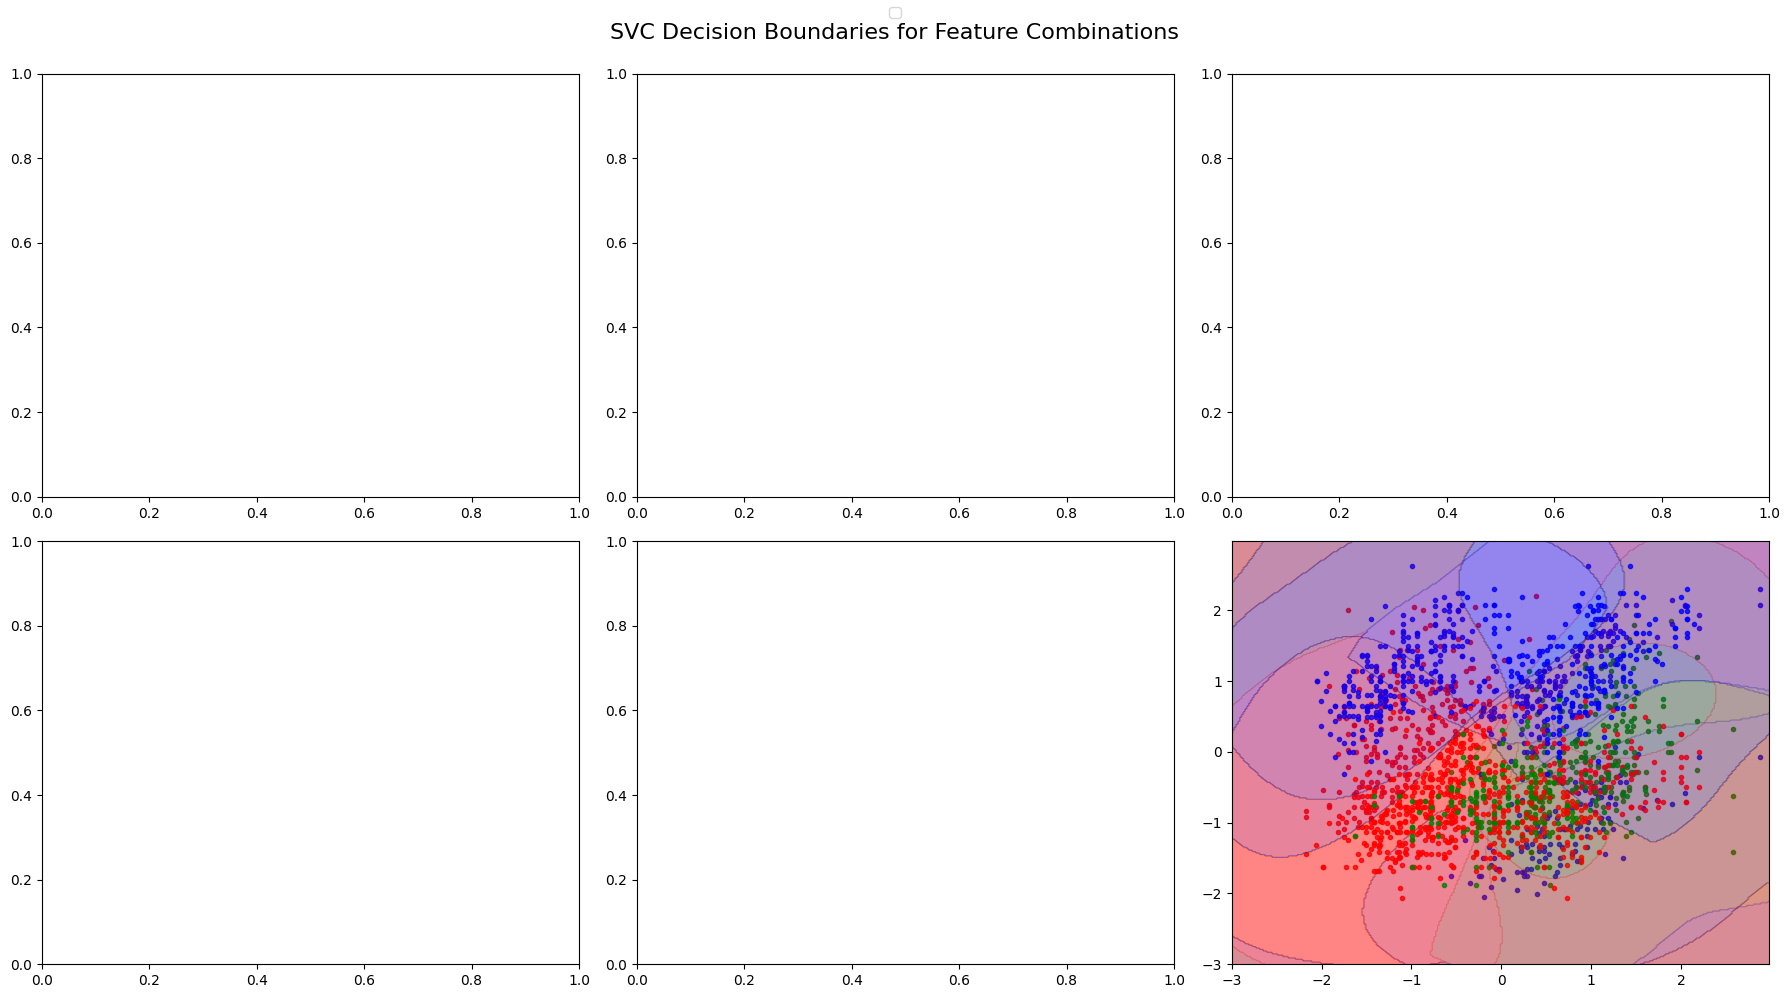

In [246]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (f1, f2) in enumerate(combinations(x1, 2)):
    x2 = pg[[f1, f2]].values

    sc = StandardScaler()
    x_scaled = sc.fit_transform(x2)
    
    svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
    svc.fit(x_scaled, y)

    plot_decision_regions2(x_scaled, y, svc, axes[idx], f1, f2)
    
    # plt.figure(figsize=(6, 4))
    # plot_decision_regions(x2, y, svc)
    # plt.title(f"{f1} vs {f2}")
    # plt.xlabel(f1)
    # plt.ylabel(f2)
    # plt.show()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("SVC Decision Boundaries for Feature Combinations", fontsize=16)
plt.show()